# **IS 4487 Assignment 9: Customer Segmentation with Clustering**

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Business Context: Hotel Bookings

### Dataset Description:

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, clustering, and trend analysis exercises.

## **Task 1. Setup and Load Data**

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

1.1. Import the necessary Python libraries

1.2. Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here) or using this link: https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-02-11/hotels.csv

1.3. Display the first few rows



In [1]:
# 🔧 1.1. Add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 🔧 1.2. Add code here
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv"
df = pd.read_csv(url)

# 🔧 1.3. Add code here
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### ✍️ Please answer the following:

1.4. What stands out in the initial preview? Any columns or rows that seem unusual?

No reservations are canceled and a lot of the data is the same/very similar.

### ✍️ Your Response:

1.4.

## **Task 2. Select and Prepare Features**

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

2.1. Choose 3-5 numeric features related to customer behavior

2.2. Drop missing values if needed

2.3. Standardize using `StandardScaler`



In [4]:
# 🔧 2.1. Add code here


#These three

#1. previous_cancellations
#2. lead_time
#3. stays_in_week_nights

# 🔧 2.2. Add code here

df_clean = df.dropna(subset=['previous_cancellations', 'lead_time', 'stays_in_week_nights'])

# 🔧 2.3. Add code here
cols_to_scale = ['previous_cancellations', 'lead_time', 'stays_in_week_nights']


scaler = StandardScaler()


df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])


print(df_clean[cols_to_scale].head())

   previous_cancellations  lead_time  stays_in_week_nights
0                -0.10318   2.227051             -1.310240
1                -0.10318   5.923385             -1.310240
2                -0.10318  -0.907814             -0.786207
3                -0.10318  -0.851667             -0.786207
4                -0.10318  -0.842309             -0.262174


### ✍️ Please answer the following:

2.4. What features did you select and why?

2.5. What kinds of patterns or segments do you expect to find?

### ✍️ Your Response:
2.4. I selected previous_cancellations, lead_time, stays_in_week_nights; because of their relvance to customer behavior with regards to time, cancellations, and time in hotel.

2.5. Different segments of customers being reliable and showing up to their reservations and others with cancellations.


## **Task 3. Apply K-Means Clustering**

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

3.1. Fit a `KMeans` model with your selected features. Choose a value of `k` (e.g. 3, 4, or 5)

3.2. Predict clusters and assign to each guest

3.3. Visualize using a scatterplot of 2 key features (optionally use a third feature for size or a fourth feature for style)

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.



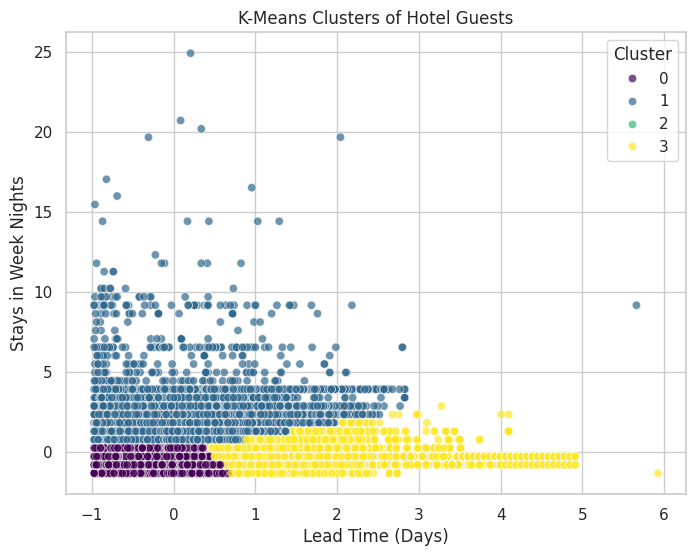

In [6]:
# 🔧 3.1. Add code here
cols = ['previous_cancellations', 'lead_time', 'stays_in_week_nights']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[cols])

# Fit KMeans model (choose k)
k = 4   # You can try 3, 4, or 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(df_scaled)
# 🔧 3.2. Add code here
df_clean['cluster'] = kmeans.predict(df_scaled)
# 🔧 3.3. Add code here
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clean,
    x='lead_time',
    y='stays_in_week_nights',
    hue='cluster',
    palette='viridis',
    alpha=0.7
)

plt.title('K-Means Clusters of Hotel Guests')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Stays in Week Nights')
plt.legend(title='Cluster')
plt.show()

### ✍️ Please answer the following:

3.4. What `k` value did you choose, and how did you decide?

3.5. What types of customers seem to show up in the clusters?

### ✍️ Your Response:
3.4. 4 and because that was what was recommended.

3.5. Longer lead time with shorter time in during week days, and short lead times with clusters of people staying in during week and going out.


## **Task 4. Apply Gaussian Mixture Model (GMM)**

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

4.1. Fit a GMM with the same number of clusters you chose in Part 3

4.2. Predict soft clusters (remember that soft clustering deals with probabilities, not labels). Show the cluster probabilities for 5 sample observations/customer records.

4.3. Visualize the GMM model so that you may compare it to the KMeans scatterplot



In [ ]:
# 🔧 4.1. Add code here


# 🔧 4.2. Add code here


# 🔧 4.3. Add code here



### ✍️ Please answer the following:

4.4. How did the GMM results compare to KMeans? You can compare visualizations or cross-tabulations/contingency tables.

4.5. What business questions might GMM help answer better?

### ✍️ Your Response:
4.4.

4.5.


## **Task 5. Evaluate Your Models**

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics, such as
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index

5.1. - 5.2. Compare above metrics for both models - K-Means and GMM clusters

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering


In [ ]:
# 🔧 5.1. Add code here


# 🔧 5.2. Add code here

### ✍️ Please answer the following:

5.3. Which model performed better on the metrics?

5.4. Would you recommend KMeans or GMM for a business analyst? Why?

### ✍️ Your Response:
1.

2.


## **Task 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

6.1. Review relevant characteristics of each cluster (e.g. average `lead_time`, `special_requests`) to help you compare the clusters meaningfully. You can use K-Means clusters.Think from a marketing or hotel operations perspective



In [ ]:
# 🔧 6.1. Add code here

### ✍️ Please answer the following:

6.2. What do the segments represent in terms of guest behavior?

6.3. How could the hotel tailor services or promotions to each group?


### ✍️ Your Response:
1.

2.


## **Task 7. Final Reflection**

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### ✍️ Please answer the following:

7.1. What was most challenging about unsupervised learning?

7.2. When would you use clustering instead of supervised models?

7.3. How would you explain the value of clustering to a non-technical manager?

7.4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response:

7.1.

7.2.

7.3.

7.4.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Save the file with your last name and first name as shown below (see detailed instructions in Lab 1 on how to do this).
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_09_LastnameFirstname.ipynb"